![](https://i.imgur.com/R5Do8QK.jpg) 

# Exploratory Data Analysis - Loan Investment  Case Study

### Scope

This project is about consumer finance company which specialised in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision: 

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company: 

**Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. 
These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### What is Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering meaningful insights and nuggets using different kind of statistical measures and visualizations. The objective of EDA is to develop an understanding of data by uncovering trends, relationships and patterns.

When it comes to the requirement of statistical knowledge, visulaization technique and data analysis tools like Numpy, Pandas, Matplotlib, etc. we categories it as an art. When there is reqirement of asking interesting questions to guide the investigation for generating meaningful insight we call it a science. So it is a mixture of both art and science.

### How to Run the Code

The best way to learn the material is to execute the code and experiment with it yourself. This tutorial is an executable [Jupyter notebook](https://jupyter.org). You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

## Project Outline
 - Download and read the dataset.
 - Data Processing & Cleaning with Pandas
 - Exploratory Analysis and Visualization
 - Asking and Answering Questions
 - Summary and Conclusion 
 - References and Future Work

## Download and read the dataset

Let's start by installing the required libraries and importing the useful modules.

In [1]:
!pip install jovian pandas matplotlib seaborn plotly --upgrade --quiet

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
import jovian
import os
%matplotlib inline

# Configuring graph settings
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Load the CSV file using `Pandas` library and store the data into a dataframe named as `loan`.

In [3]:
loan = pd.read_csv('data.csv', low_memory=False)

In [4]:
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%        59.83     C        C4  ...   
2       36 months   15.96%        84.33     C        C5  ...   
3       36 months   13.49%       339.31     C        C1  ...   
4       60 months   12.69%        67.79     B        B5  ...   
...           ...      ...          ...   ...       ...  ...   
39712   36 months    8.07%        78.42     A        A4  ...   
39713   36 months   10.28%       275.38     C        C1  ...   
39714   36 months    8.07%       156.84     A        A4  ...   
39715   36 months    7.43%       155.38     A        A2  ...   
39716   36 months   13.75%       255.43     E        E2  ...   

      num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
0                    NaN                NaN            NaN               NaN   
1                    NaN                NaN            NaN               NaN   
2                    NaN                NaN            NaN               NaN   
3                    NaN                NaN            NaN               NaN   
4                    NaN                NaN            NaN               NaN   
...                  ...                ...            ...               ...   
39712                NaN                NaN            NaN               NaN   
39713                NaN                NaN            NaN               NaN   
39714                NaN                NaN            NaN               NaN   
39715                NaN                NaN            NaN               NaN   
39716                NaN                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
0                      0.0       0.0             NaN               NaN   
1                      0.0       0.0             NaN               NaN   
2                      0.0       0.0             NaN               NaN   
3                      0.0       0.0             NaN               NaN   
4                      0.0       0.0             NaN               NaN   
...                    ...       ...             ...               ...   
39712                  NaN       NaN             NaN               NaN   
39713                  NaN       NaN             NaN               NaN   
39714                  NaN       NaN             NaN               NaN   
39715                  NaN       NaN             NaN               NaN   
39716                  NaN       NaN             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
0                NaN                        NaN  
1                NaN                        NaN  
2                NaN                        NaN  
3                NaN                        NaN  
4                NaN                        NaN  
...              ...                        ...  
39712            NaN                        NaN  
39713            NaN                        NaN  
39714            NaN                        NaN  
39715            NaN                        NaN  
39

There are more than 39717 rows in the dataset which represents the each loan dispersed to the individuals and 111 columns represents the details of the borrower. Each loan has been assigned a randomized unique ID.

To get a look of all the columns in the dataframe we can use `columns` property.

In [5]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## Data Preprocessing & Cleaning

As we can see there are a number of columns in the dataframe but in this project we will limit our analysis to only few columns. So let's check the missing values and remove unnecessary columns

In [6]:
#Summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

It seems we have so many columns with 100% missing values and these columns don't provide us any information. Let's look at the graphical representation of columns with missing values. 

Populating the interactive namespace from numpy and matplotlib


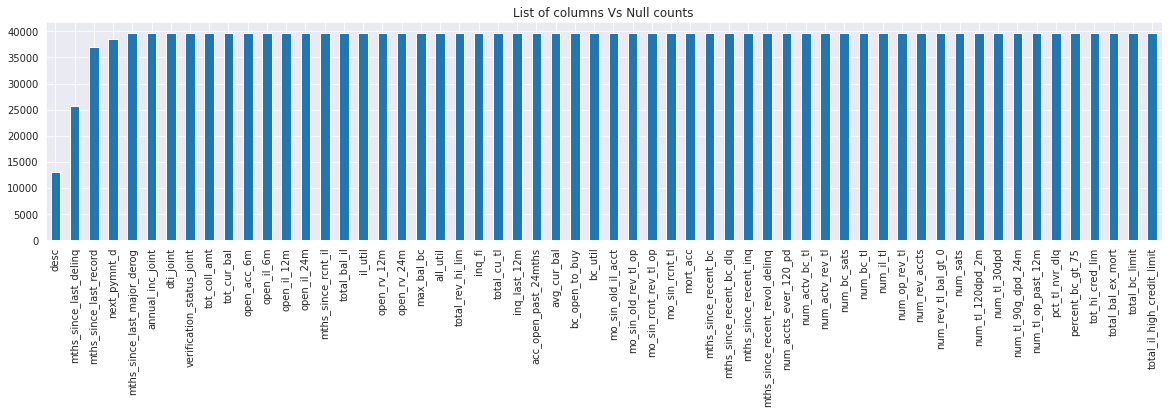

In [7]:
%pylab inline
null_columns = loan.isnull().sum()  # to find the number of null values in each column
null_columns = null_columns[null_columns.values > (0.30*len(loan))]
plt.figure(figsize(20,4))
null_columns.plot(kind='bar')
plt.title('List of columns Vs Null counts')
plt.show();

From the above graph we can see that there are many (around 30+) columns which are having more than 30% of their values as Null. So these columns are not useful and hence we will remove them from our dataframe

Let's drop the columns with more than 30% missing values

In [8]:
limit = len(loan)*0.7
loan.dropna(thresh = limit, axis = 1, inplace = True)

In [9]:
loan.shape

(39717, 53)

Although we have removed few columns based on NULL values,let's also drop unnecessary columns which we are not using for analysis

In [10]:
columnns_todrop = {'member_id','pymnt_plan','emp_title','title','url','zip_code','last_credit_pull_d','out_prncp','out_prncp_inv','collections_12_mths_ex_med','earliest_cr_line','policy_code','initial_list_status','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'}

In [11]:
loan = loan.drop(columnns_todrop, axis=1)

In [12]:
# Summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                         0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collecti

In [13]:
loan.shape

(39717, 36)

Now that we have removed the non relevant columns and many columns which had missing values from our dataframe, Let's update the data type formats are columns which we will be use for our analysis further in next section.

##### Data Cleansing : Fixing Rows and Columns: DataType changes and column values fixing

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [15]:
# Convert string object to date object for below columns
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format = '%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format = '%b-%y')

In [16]:
loan['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [17]:
# Remove % and change the datatype to float
loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype('float')

In [18]:
loan['revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object

In [19]:
# Change the format from % to float
loan['revol_util'] = loan['revol_util'].str.rstrip('%').astype('float')/100

In [20]:
# It shows there is extra space in column value
list(loan['term'])[0:5]

[' 36 months', ' 60 months', ' 36 months', ' 36 months', ' 60 months']

In [21]:
# Remove the space
loan['term'] = loan['term'].str.strip()
# Remove the months word from column value and change the datatype
loan['term'] = loan['term'].str.split().str[0].astype(int)
# Rename the column name
loan.rename(columns={'term': 'term_months'}, inplace=True)

In [22]:
list(loan['term_months'])[0:5]

[36, 60, 36, 36, 60]

In [23]:
loan.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term_months  int_rate  \
0  1077501       5000         5000           4975.0           36     10.65   
1  1077430       2500         2500           2500.0           60     15.27   
2  1077175       2400         2400           2400.0           36     15.96   
3  1076863      10000        10000          10000.0           36     13.49   
4  1075358       3000         3000           3000.0           60     12.69   

   installment grade sub_grade emp_length  ... total_pymnt_inv  \
0       162.87     B        B2  10+ years  ...         5833.84   
1        59.83     C        C4   < 1 year  ...         1008.71   
2        84.33     C        C5  10+ years  ...         3005.67   
3       339.31     C        C1  10+ years  ...        12231.89   
4        67.79     B        B5     1 year  ...         3513.33   

   total_rec_prncp total_rec_int total_rec_late_fee recoveries  \
0          5000.00        863.16               0.00       0.00   
1           456.46        435.17               0.00     117.08   
2          2400.00        605.67               0.00       0.00   
3         10000.00       2214.92              16.97       0.00   
4          2475.94       1037.39               0.00       0.00   

  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  application_type  \
0                    0.00   2015-01-01           171.62        INDIVIDUAL   
1                    1.11   2013-04-01           119.66        INDIVIDUAL   
2                    0.00   2014-06-01           649.91        INDIVIDUAL   
3                    0.00   2015-01-01           357.48        INDIVIDUAL   
4                    0.00   2016-05-01            67.79        INDIVIDUAL   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 36 columns]

#### Summary statistics of relevant columns and filling the missing values

##### Column: revol_util

In [24]:
loan.revol_util.describe()

count    39667.000000
mean         0.488322
std          0.283326
min          0.000000
25%          0.254000
50%          0.493000
75%          0.724000
max          0.999000
Name: revol_util, dtype: float64

Since there is no much spread of data and the difference between mean and median is very small, let's impute the missing values with mean

In [25]:
# Impute the revol_util column with mean value
loan.loc[np.isnan(loan['revol_util']),['revol_util']] = loan['revol_util'].mean()

##### Column: pub_rec_bankruptcies

In [26]:
loan.pub_rec_bankruptcies.describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [27]:
# Convert to Category type
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].astype('category')

In [28]:
# Display frequency of each category
loan['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

The most common value of pub_rec_bankruptcies is 0, so let's impute the missing values

In [29]:
# Impute the pub_rec_bankruptcies column with mode value
loan.loc[pd.isnull(loan['pub_rec_bankruptcies']), ['pub_rec_bankruptcies']] = 0

##### Column: last_pymnt_d

In [30]:
loan[loan['last_pymnt_d'].isnull()]['loan_status'].unique()

array(['Charged Off'], dtype=object)

It shows that the missing values occurres only for 'Charged Off' loan types

In [31]:
# Number of missing values
loan.last_pymnt_d.isnull().sum()

71

##### Column: home_ownership

In [32]:
# Unique values of home_ownership
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [33]:
# Check the number of loans by home_ownership
loan.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [34]:
# Replace the 'NONE' with 'RENT'(mode of home_ownership column)
loan['home_ownership'] = loan.home_ownership.str.replace('NONE','RENT')

In [35]:
loan.home_ownership.value_counts()

RENT        18902
MORTGAGE    17659
OWN          3058
OTHER          98
Name: home_ownership, dtype: int64

##### Column: emp_length

In [36]:
# Unique values of emp_length
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [37]:
# Check the number of loans by emp_length
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [38]:
# Replace the 'n/a' with '10+ years'(mode of emp_length column)
loan['emp_length'] = loan.emp_length.str.replace('< 1 year','0')
loan['emp_length'] = loan.emp_length.str.replace(' years','')
loan['emp_length'] = loan.emp_length.str.replace(' year','')
loan['emp_length'] = loan.emp_length.str.replace('+','')
loan['emp_length'] = loan.emp_length.str.replace('n/a','10')

/tmp/ipykernel_53/4066501343.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan['emp_length'] = loan.emp_length.str.replace('+','')


In [39]:
# Convert datatype
loan['emp_length'] = pd.to_numeric(loan['emp_length'])

In [40]:
# Check the number of loans by emp_length
loan.emp_length.value_counts()

10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

##### Column: issue_d

In [41]:
# Extract the month, year from issue_d column
loan['issued_month'] = loan['issue_d'].dt.month
loan['issued_year'] = loan['issue_d'].dt.year

#### Calculate the Return of Investment (ROI) 

**Return on investment** (ROI) is a widely used financial metric for measuring the probability of gaining a 
return from an investment. It is a ratio that compares the gain or loss from an investment relative to its cost. 
It is as useful in evaluating the potential return from a stand-alone investment as it is in comparing returns 
from several investments.

Let's calculate ROI based on data available for us which we will use for analysis later on.

**ROI =  (Final Value Of Investment - Initial Value Of Investment / Cost of Investment) - 1**

In [42]:
loan['roi'] = round(((loan['total_pymnt']-loan['collection_recovery_fee'])/loan['funded_amnt'])-1, 2)

In [43]:
# For further analysis, let's filter the loan data by ignoring loan_status of 'Current', since these are currently running loans.
loan = loan[loan['loan_status']!='Current']
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38577 non-null  int64         
 1   loan_amnt                38577 non-null  int64         
 2   funded_amnt              38577 non-null  int64         
 3   funded_amnt_inv          38577 non-null  float64       
 4   term_months              38577 non-null  int64         
 5   int_rate                 38577 non-null  float64       
 6   installment              38577 non-null  float64       
 7   grade                    38577 non-null  object        
 8   sub_grade                38577 non-null  object        
 9   emp_length               37544 non-null  float64       
 10  home_ownership           38577 non-null  object        
 11  annual_inc               38577 non-null  float64       
 12  verification_status      38577 n

In the above section we have preprocessed and cleaned our data so that we can get some insights and nuggets out of the data in our next section. 

## Exploratory Analysis and Visualization

This section of the project is all about exploring different columns of the data frame so that we can understand the trends in the data, get the nuggets and insights out of it using graphical representation.

In this dataset we can see the individuals borrowed the loan from a company but some of them are still obligate to the loan lender company. In this project we will try to get the cognizance of loan defaults.

### Loan Defaulter Analysis
- Home Ownerships
- Loan Purpose
- Grade
- Home Ownerships & Loan Purpose
- Grade & Loan Purpose

#### Home Ownerships

In [44]:
loan[loan['loan_status']=='Charged Off'].groupby(['home_ownership']).home_ownership.count()

home_ownership
MORTGAGE    2327
OTHER         18
OWN          443
RENT        2839
Name: home_ownership, dtype: int64

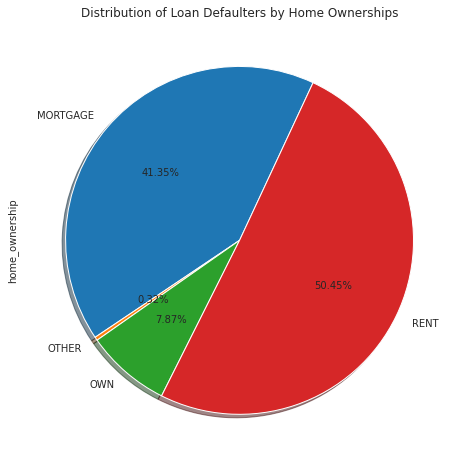

In [45]:
plt.figure(figsize=(8,8))
plt.title('Distribution of Loan Defaulters by Home Ownerships')
graph =  loan[loan['loan_status']=='Charged Off'].groupby(['home_ownership'])['home_ownership'].count();
fig = graph.plot.pie(autopct='%.2f%%', shadow = True, startangle = 65);

**Observation**:
It shows there are more defaulters in RENT and MORTGAGE.

#### Loan Purpose

In [46]:
loan[loan['loan_status']=='Charged Off'].groupby(['purpose'])['purpose'].count()

purpose
car                    160
credit_card            542
debt_consolidation    2767
educational             56
home_improvement       347
house                   59
major_purchase         222
medical                106
moving                  92
other                  633
renewable_energy        19
small_business         475
vacation                53
wedding                 96
Name: purpose, dtype: int64

**Observation**:
There are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'.

#### Grade

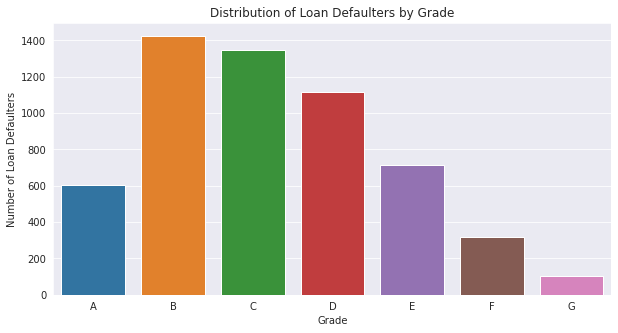

In [47]:
plt.figure(figsize=[10, 5])
sns.countplot(x='grade',  data=loan[loan['loan_status']=='Charged Off'], order=np.sort(loan['grade'].unique()))
plt.title('Distribution of Loan Defaulters by Grade')
plt.xlabel("Grade")
plt.ylabel("Number of Loan Defaulters")
plt.show()

In [48]:
loan[loan['loan_status']=='Charged Off'].groupby(['grade'])['grade'].count()

grade
A     602
B    1425
C    1347
D    1118
E     715
F     319
G     101
Name: grade, dtype: int64

**Observation**:

1. It shows there are more defaulters in B,C and D grades.
 
2. Grades F,G(more intereste rate grades) are having less defaulters which is a good indicator.

#### Home Ownerships & Loan Purpose

In [49]:
loan[loan['loan_status']=='Charged Off'].groupby(['home_ownership','purpose'])['home_ownership'].count()

home_ownership  purpose           
MORTGAGE        car                     70
                credit_card            234
                debt_consolidation    1145
                educational             12
                home_improvement       266
                house                   19
                major_purchase          75
                medical                 42
                moving                   8
                other                  187
                renewable_energy         9
                small_business         214
                vacation                13
                wedding                 33
OTHER           car                      1
                credit_card              2
                debt_consolidation       7
                home_improvement         1
                moving                   1
                other                    2
                small_business           4
OWN             car                     15
                cre

**Observation**:

1. From RENT category, there are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'.

2. From MORTGAGE category, there are more defaulters from 'debt_consolidation','home_improvement', 'credit_card' and 'small_business'.

Overall, one should be carefull with 'debt_consolidation', 'credit_card' and 'small_business' loans when the borrowers dont have own house.

#### Grade & Loan Purpose

In [50]:
loan[loan['loan_status']=='Charged Off'].groupby(['grade','purpose'])['grade'].count()

grade  purpose           
A      car                    32
       credit_card            63
       debt_consolidation    243
       educational             5
       home_improvement       41
                            ... 
G      moving                  1
       other                   9
       renewable_energy        2
       small_business         21
       wedding                 2
Name: grade, Length: 93, dtype: int64

**Observation**: From all grades, there are more defaulters from 'debt_consolidation', 'others', 'credit_card' and 'small_business' purpose loans.

### Overall Loan Defaulters

In [51]:
loan_tmp = loan[loan['loan_status'] != 'Current']
loan_tmp['loan_status'] = loan_tmp['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
loan_tmp['loan_status'] = loan_tmp['loan_status'].apply(lambda x: pd.to_numeric(x))

In [52]:
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=loan_tmp)
    plt.show()

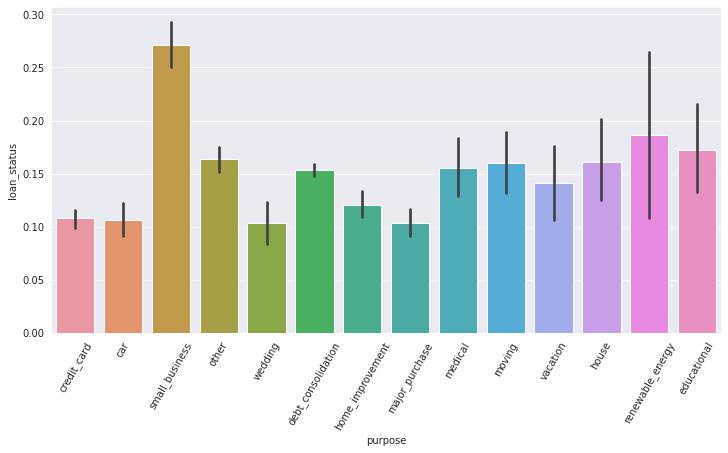

In [53]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=60)
plot_cat('purpose')

**Observation**: We see that small business loans default the most, then renewable energy and education

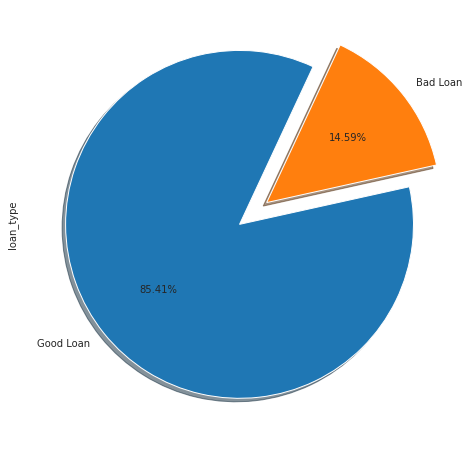

In [54]:
# Based on loan_status only 'Charged Off' is bad or defaulter loan
bad_loan = ["Charged Off"]

# Creating an empty column to store the loan type
loan['loan_type'] = np.nan

# Function to set the loan type
def loan_type(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
# Applying the function to all statuses    
loan['loan_type'] = loan['loan_status'].apply(loan_type)

# Making a pie chart of good loans and bad loans
plt.figure(figsize=(8,8))
loan.loan_type.value_counts().plot.pie(explode = [0, 0.2],autopct='%1.2f%%', shadow = True, startangle = 65);

**Observation**:
There are good chunk of around 14% considered as Bad/Defaulter loan.

### Distribution of Loans

In [55]:
fig = px.treemap(loan,
                 path=["purpose"],
                 values='loan_amnt',
                 title="Distribution of Loan amount based on purpose")
fig.show();

/opt/conda/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


**Observation**:
There are more loan applicant's with purpose of debt consolidation followed by credit card and other. Looks like Home improvement is also major reason for applying to loan. 

### Interest Rate Distribution analysis

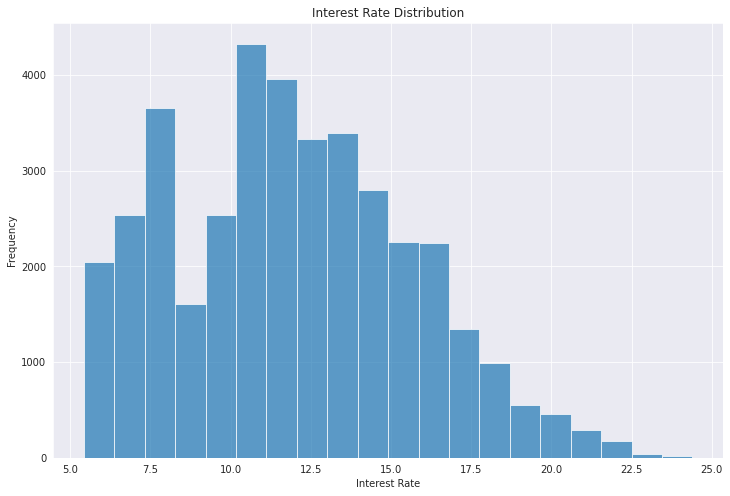

In [56]:
# Interest Rate Distribution analysis to see where the interest rates are predominantly present
y = loan.int_rate.values
pd.Series(y).plot(kind='hist',alpha=.7, bins=20, title='Interest Rate Distribution',figsize=(12,8),grid=True)
sns.set()
plt.xlabel('Interest Rate')
plt.show()

**Observation** : Interest distribution signifies that the percentage is more concentrated between 10 and 14.

### Employee length analysis

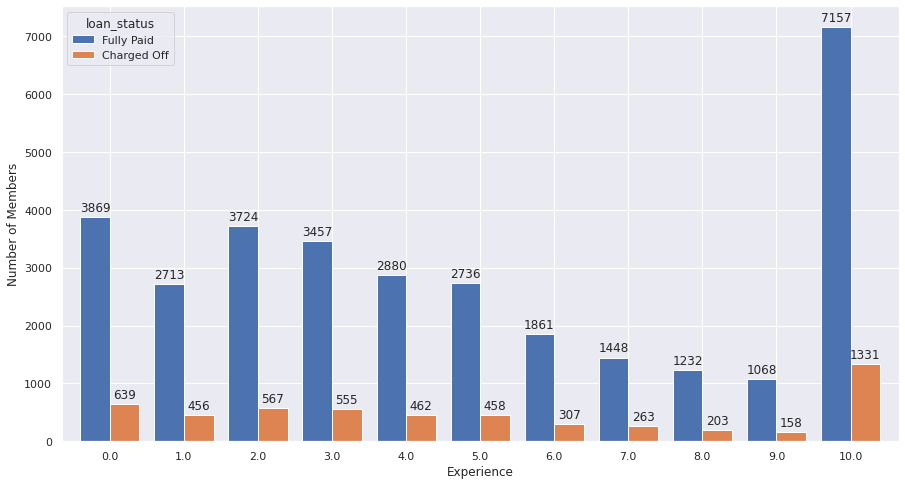

In [57]:
# Emp length vs Loan Status(Count Plot)
df_loan_term = loan[['emp_length', 'loan_status']]
df_loan_term = df_loan_term.groupby(['emp_length', 'loan_status'])
#print(df_loan_term.size().unstack().reindex(['Fully Paid','Charged Off','Current'], axis=1))
ax=df_loan_term.size().unstack().reindex(columns=['Fully Paid', 'Charged Off']).plot(kind='bar', stacked=False, figsize=(15, 8),width=0.8)
plt.xlabel("Experience")
plt.ylabel("Number of Members")
plt.xticks(rotation=0)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1}'.format((height)),
            ha="center",)
plt.show()

**Observation**

1. The total number of defaulters with 1 year and No work experince is around 1k

2. The total number of defaulters with 10 and 10 + years of experience are 1331

3. The trend of defaulters is lowering when we take the set of 1-9 years of work experience and 
it suddenly increases in the case of 10 and 10+ years of work experienced members

### Grade analysis 

In [58]:
loan[loan['loan_status']=='Charged Off'].groupby(['grade','home_ownership'])['home_ownership'].count()

grade  home_ownership
A      MORTGAGE          266
       OTHER               2
       OWN                52
       RENT              282
B      MORTGAGE          594
       OTHER               6
       OWN               115
       RENT              710
C      MORTGAGE          541
       OTHER               2
       OWN               109
       RENT              695
D      MORTGAGE          429
       OTHER               5
       OWN                82
       RENT              602
E      MORTGAGE          306
       OTHER               2
       OWN                51
       RENT              356
F      MORTGAGE          149
       OTHER               1
       OWN                23
       RENT              146
G      MORTGAGE           42
       OWN                11
       RENT               48
Name: home_ownership, dtype: int64

**Observation**: 
1. It shows there are more defaulters in B,C and D grades.
2. Grades F,G(more intereste rate grades) are having less defaulters which is a good indicator.

In [59]:
fig = px.scatter(loan,
                 x='loan_amnt',
                 y='recoveries',
                 color='grade',
                 title="Loan recovery based on grade",
                 labels={
                     "loan_amnt": "Loan Amount",
                     "recoveries": "Recovered Amount",
                     "grade": "Grade"
                 },);
fig.show();

**Observation**: Looks like Grade is not dependant on Loan recovery as it is evenly based.

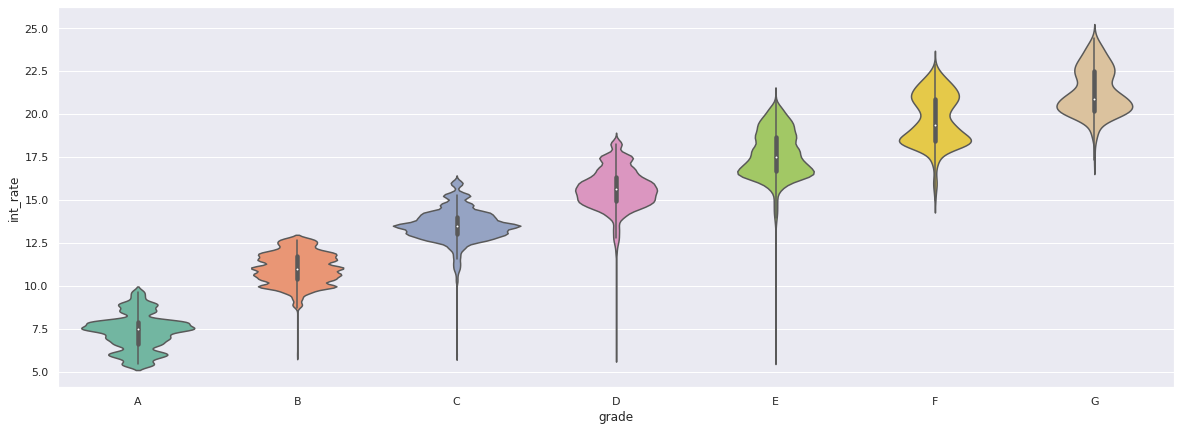

In [60]:
plt.figure(figsize=(20,7))
sns.violinplot(x='grade', y='int_rate', data=loan, palette = "Set2", order=['A','B','C','D','E','F','G']);

**Observation**: Grade is based on interest rate. As grade increases from A to G there is a increase in interest rate.
Same observation as we saw in earlier

### Frequency distributions of
- DTI (Debt-To-Income ratio)
- Revolving credit uilization
- Ratio of open_acc to total_acc
- Ratio of open_acc to total_acc

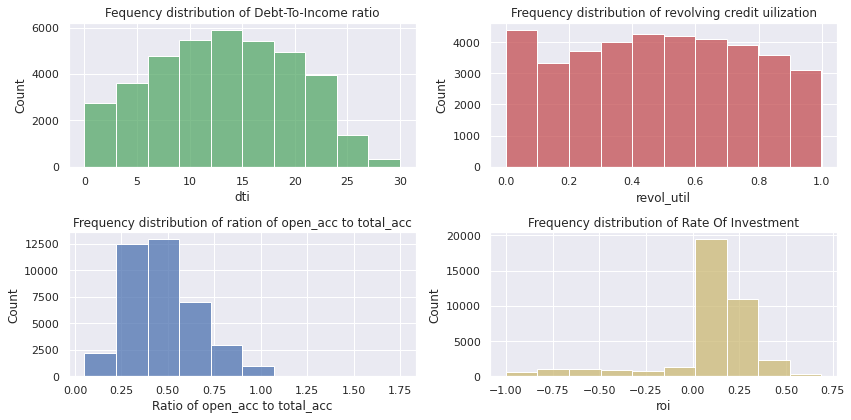

In [61]:
# Frequency distributions
plt.figure(figsize=(12,6))

plt.figure(1)

# Frequency distribution of DTI (Debt-To-Income ratio)
plt.subplot(2,2,1)
plt.title('Fequency distribution of Debt-To-Income ratio')
sns.histplot(loan["dti"], color='g', bins=10)

# Frequency distribution of revolving credit uilization
plt.subplot(2,2,2)
plt.title('Frequency distribution of revolving credit uilization')
sns.histplot(loan["revol_util"], color='r', bins=10)

# Frequency distribution of ration of open_acc to total_acc
plt.subplot(2,2,3)
plt.title('Frequency distribution of ration of open_acc to total_acc')
sns.histplot(loan["open_acc"]/loan["total_acc"], color='b', bins=10)
plt.xlabel("Ratio of open_acc to total_acc")

# Frequency distribution of Rate Of Investment
plt.subplot(2,2,4)
plt.title('Frequency distribution of Rate Of Investment')
sns.histplot(loan["roi"], color='y', bins=10)

# To adjust spacing between subplots
plt.tight_layout()
plt.show()

**Observation**:

1. The average debt-to-income ratio is 13%. There do not seem to be much skew from above distribution graph
2. The mean of revolving credit utilization is 49%, which means the average borrower is using most 
   of their revolving credit at a time when they are seeking the loan. Also, data is largely spread of 
   and not much skewed.
3. The percentage of open accounts to total accounts seems left skewed.
4. Negative ROI indicates defaulted loans while almost all of the loans with positive ROI were fully paid.

### Descriptive Statistics

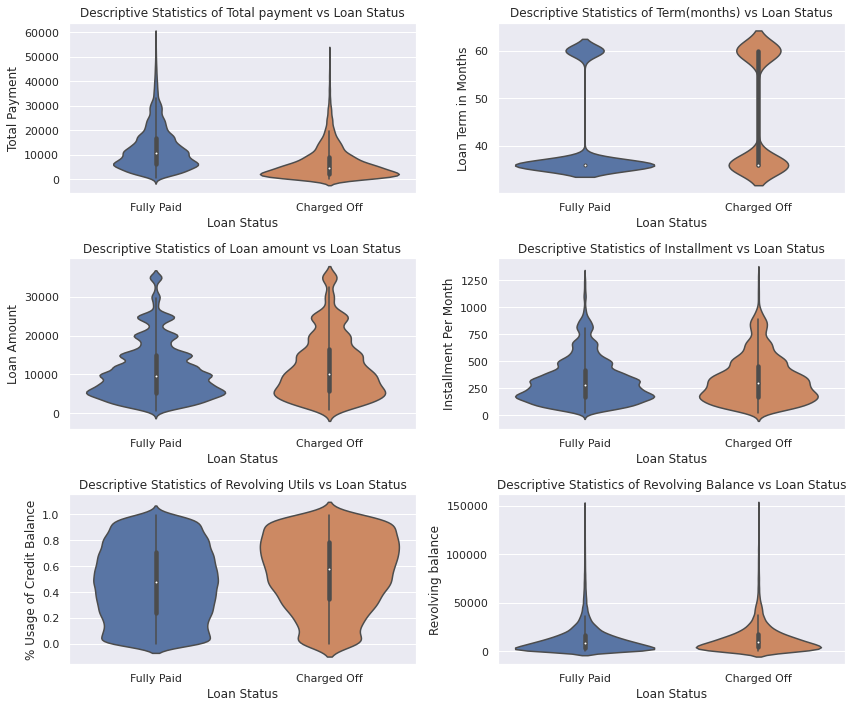

In [62]:
# Descriptive Statistics
plt.figure(figsize=(12,10))

#Descriptive Statistics of Loan Status vs total_pymnt 
plt.subplot(3,2,1)
sns.violinplot(x='loan_status', y='total_pymnt', data=loan)
plt.title('Descriptive Statistics of Total payment vs Loan Status')
plt.ylabel('Total Payment')
plt.xlabel('Loan Status')

#Descriptive Statistics of Loan Status vs term_months 
plt.subplot(3,2,2)
sns.violinplot(x='loan_status', y='term_months', data=loan)
plt.title('Descriptive Statistics of Term(months) vs Loan Status')
plt.ylabel('Loan Term in Months')
plt.xlabel('Loan Status')

#Descriptive Statistics of Loan Status vs loan_amnt 
plt.subplot(3,2,3)
sns.violinplot(x='loan_status', y='loan_amnt', data=loan)
plt.title('Descriptive Statistics of Loan amount vs Loan Status')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')

#Descriptive Statistics of Loan Status vs installment 
plt.subplot(3,2,4)
sns.violinplot(x='loan_status', y='installment', data=loan)
plt.title('Descriptive Statistics of Installment vs Loan Status')
plt.ylabel('Installment Per Month')
plt.xlabel('Loan Status')

#Descriptive Statistics of Loan Status vs revol_util 
plt.subplot(3,2,5)
sns.violinplot(x='loan_status', y='revol_util', data=loan)
plt.title('Descriptive Statistics of Revolving Utils vs Loan Status')
plt.ylabel('% Usage of Credit Balance')
plt.xlabel('Loan Status')

#Descriptive Statistics of Loan Status vs revol_bal 
plt.subplot(3,2,6)
sns.violinplot(x='loan_status', y='revol_bal', data=loan)
plt.title('Descriptive Statistics of Revolving Balance vs Loan Status')
plt.ylabel('Revolving balance')
plt.xlabel('Loan Status')

# To adjust spacing between subplots
plt.tight_layout()
plt.show()

**Observation**:

1. As expected Defaulters total payment amount is far less than Fully paid .
2. Loan term is around 40 and 60 for both fully paid and defaulters
3. Most of Loan amount is less than 200k and Installment amount is around 500 for both fully paid and defaulter    

### Correlation Analysis

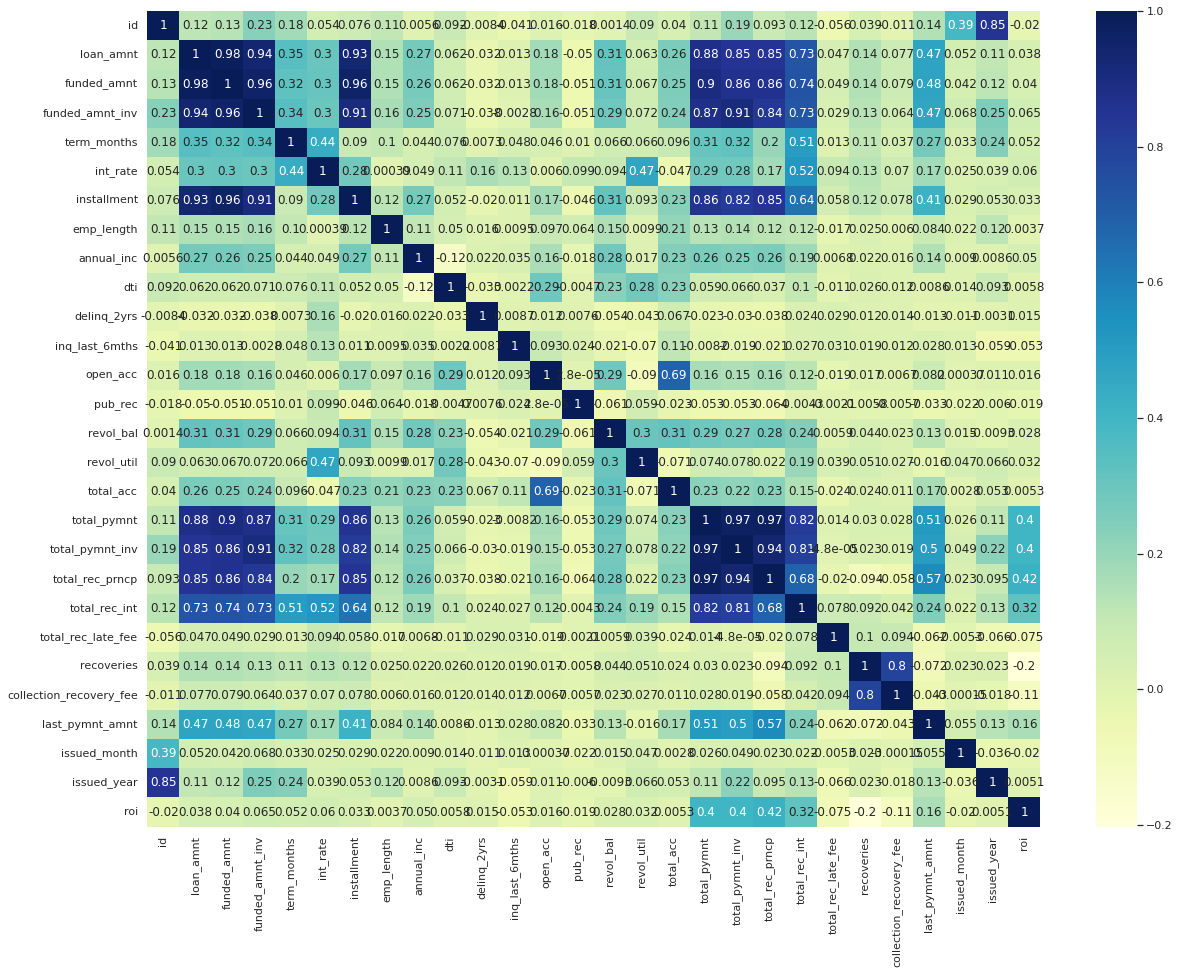

In [63]:
# Correlation Plot
cor = loan.corr()
round(cor,3)
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap='YlGnBu', annot=True)
plt.show();

**Observation**:

1. There are no highly negative correlation between columns.

2. There are some highly correlated columns at top and middle left block.

3. There is 0.45 correlation between term_months and interest rate(int_rate).

4. There is 0.47 correlation between revol_util and interest rate(int_rate).

5. There is no much correlation between Annual Income, DTI with other columns.

## Asking and Answering Questions

**Question 1: How is the distribution of Loan Defaulters by Loan Purpose?**

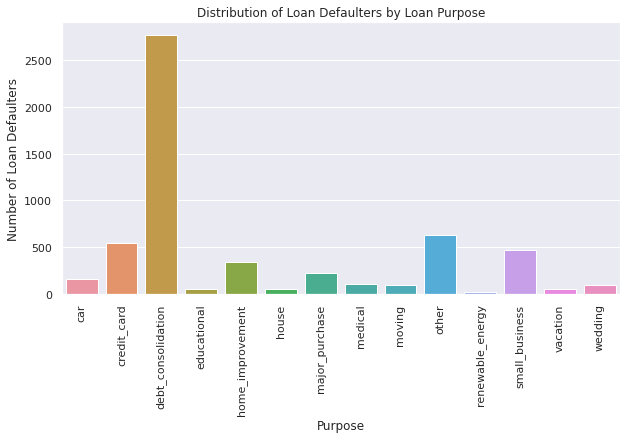

In [64]:
plt.figure(figsize=[10, 5])

sns.countplot(x='purpose',  data=loan[loan['loan_status']=='Charged Off'], order=np.sort(loan['purpose'].unique()))
plt.title('Distribution of Loan Defaulters by Loan Purpose')
plt.xlabel("Purpose")
plt.ylabel("Number of Loan Defaulters")
# To rotate axis text
plt.xticks(rotation=90)
plt.show()

 As per the above graph, there are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'.   

**Question 2: How are loans issued based on years?**

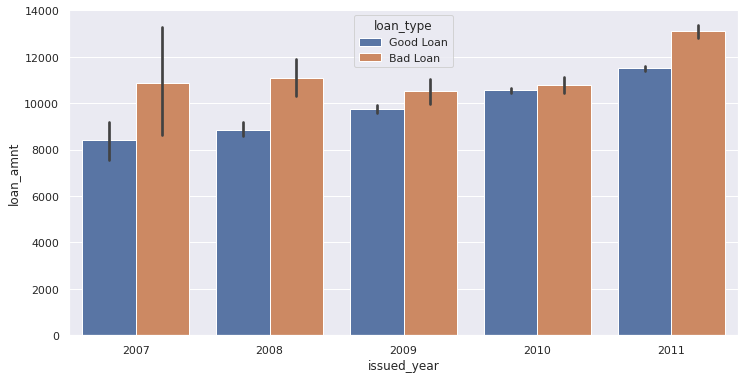

In [65]:
#Yearwise correlation of loan amount and loan type
plt.figure(figsize=(12,6))
sns.barplot(x=loan.issued_year, y=loan.loan_amnt, hue=loan.loan_type);

Number of loans issued increased steadily by every year with a slight decrease in 2008.

**Question 3: What can we confirm from looking at distribution of Loan Defaulters by Home Ownerships?**

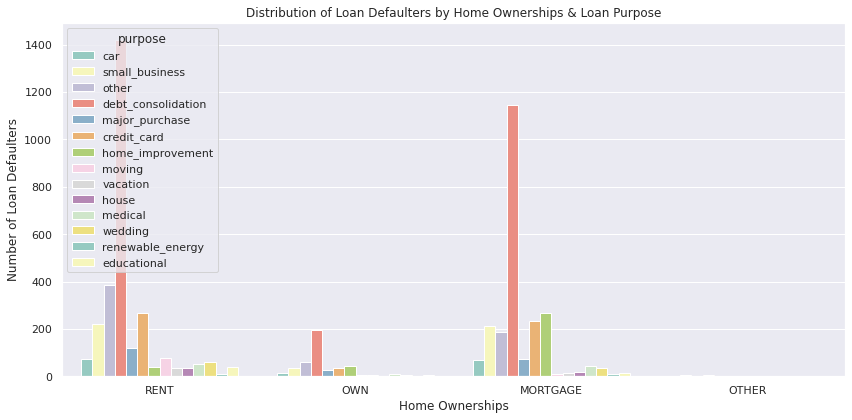

In [66]:
# Distribution of Loan Defaulters by Home Ownerships & Loan Purpose
plt.figure(figsize=(12,6))
sns.countplot(x='home_ownership', hue='purpose', data=loan[loan['loan_status']=='Charged Off'], palette="Set3")

plt.title('Distribution of Loan Defaulters by Home Ownerships & Loan Purpose')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")
plt.tight_layout()
plt.show()

Borrowers with own house and the purpose of loan with consolidate debt, 'credit_card' and 'small_business' are not at much risk, but borrower with rent,mortgage are high risk applicants.

**Question 4: How does grade impact the loans status?**

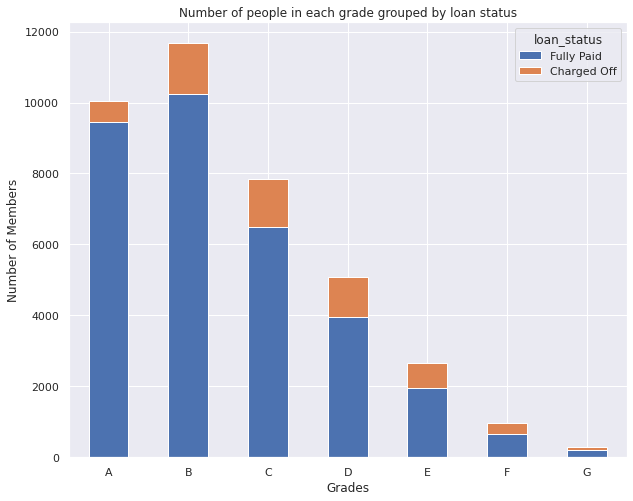

In [67]:
# Loan_status vs Grade analysis (Count Plot)
df_loan_grade = loan[['grade', 'loan_status']]
df_loan_grade = df_loan_grade.groupby(['grade','loan_status'])
df_loan_grade.size().unstack().reindex(columns=['Fully Paid', 'Charged Off']).plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xlabel('Grades')
plt.ylabel('Number of Members')
plt.xticks(rotation=0)
plt.title('Number of people in each grade grouped by loan status')
plt.show();

It shows there are more defaulters in B,C and D grades.Grades F,G(more intereste rate grades) are having less defaulters which is a good indicator.

**Question 5: What is relationship between interest rate and loan grade?**

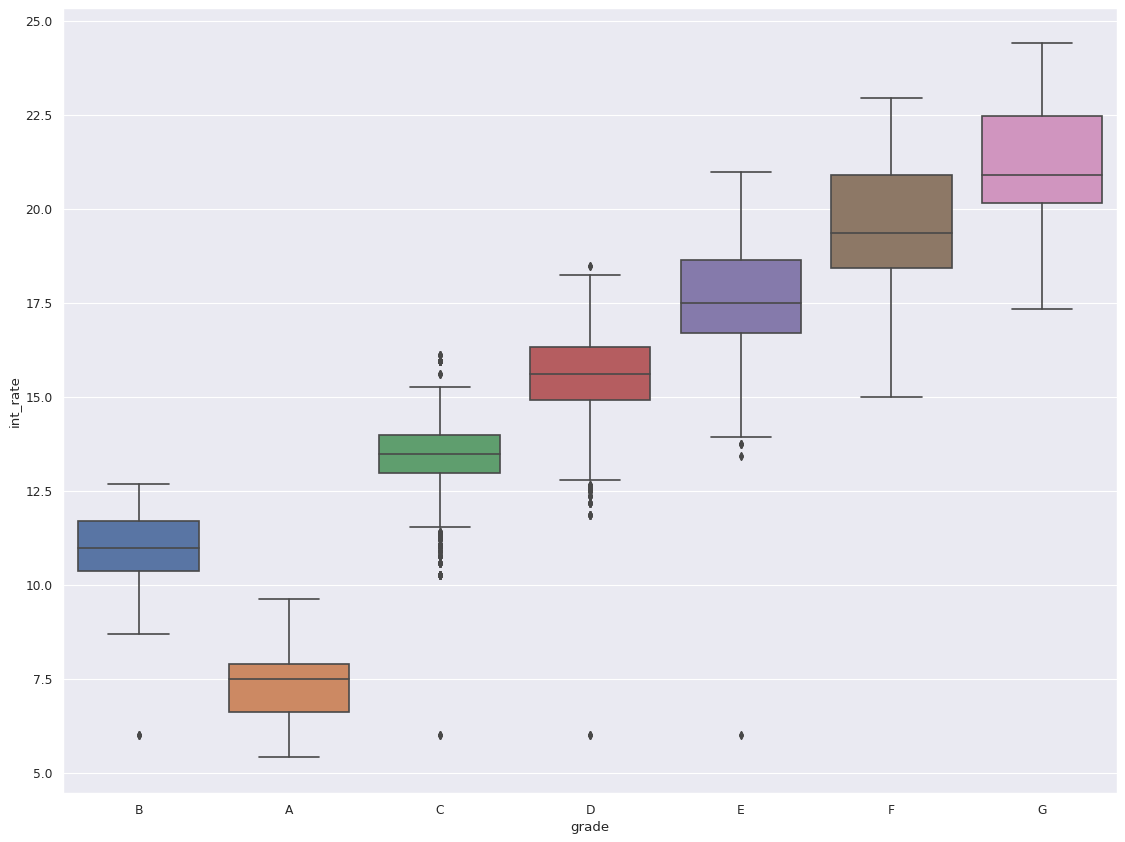

In [68]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(17, 13), dpi=80, facecolor='w', edgecolor='k')

sns.boxplot(x='grade',y='int_rate', data=loan, order=loan['grade'].value_counts().index)
plt.show();

There is an inverse relationship between interest rate and loan grade - lower grades(E,F,G) have higher interest rate.

**Question 6: Who are the major defaulters based on purpose from all grades?**

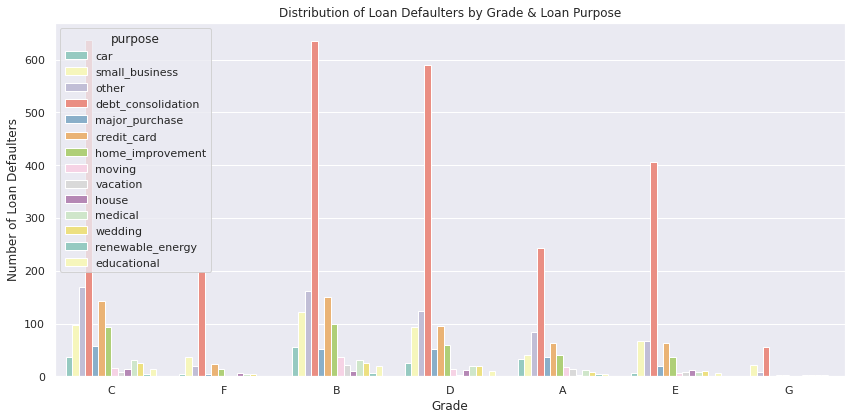

In [69]:
# Distribution of Loan Defaulters by Grade & Loan Purpose
plt.figure(figsize=(12,6))
sns.countplot(x='grade', hue='purpose', data=loan[loan['loan_status']=='Charged Off'], palette="Set3")

plt.title('Distribution of Loan Defaulters by Grade & Loan Purpose')
plt.xlabel("Grade")
plt.ylabel("Number of Loan Defaulters")
plt.tight_layout()
plt.show();

Overall, there are more defaulters from 'debt_consolidation', 'others', 'credit_card' and 'small_business' purpose loans from all grades.

**Question 7: When was the credit obtained from loan utilized by seeker?**

In [70]:
loan["revol_util"].describe()

count    38577.000000
mean         0.487029
std          0.283464
min          0.000000
25%          0.252000
50%          0.490000
75%          0.722000
max          0.999000
Name: revol_util, dtype: float64

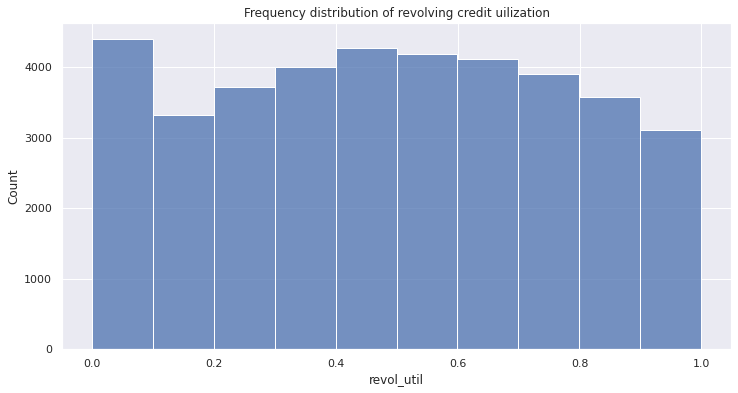

In [71]:
plt.figure(figsize=(12,6))

# Frequency distribution of revolving credit uilization
plt.title('Frequency distribution of revolving credit uilization')
sns.histplot(loan["revol_util"], color='b', bins=10);

The mean of revolving credit utilization is 49%, which means the average borrower is using most of their revolving credit at a time when they are seeking the loan. Also, there is large spread of data but not much skewed.

**Question 8: How are load amount distributed based on work experience of the seeker?**

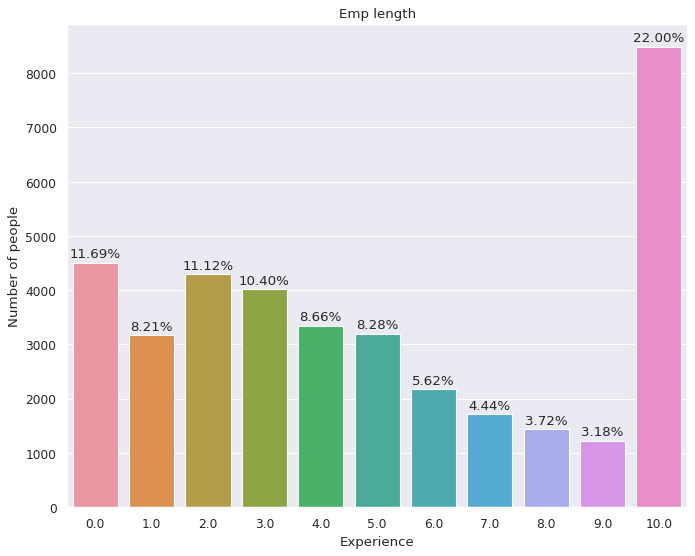

In [72]:
categorized_cols = ['grade', 'home_ownership', 'purpose', 'loan_status', 'emp_length']
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
plt.tight_layout()
total=loan.id.count()
sns.set(style="darkgrid")
ax=sns.countplot(x=loan[categorized_cols[4]].sort_values())
plt.ylabel('Number of people')
plt.xlabel('Experience')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}%'.format((height/total)*100),
            ha="center",)
title = categorized_cols[4].capitalize()
title=title.replace('_',' ')
plt.title(title) 
plt.show();

We observe that loan trend gets downward with work experience from 1 to 9 years.However it is the highest with respect to people with and above 10 years of experience.

**Question 9: What does Interest distribution signifies?**

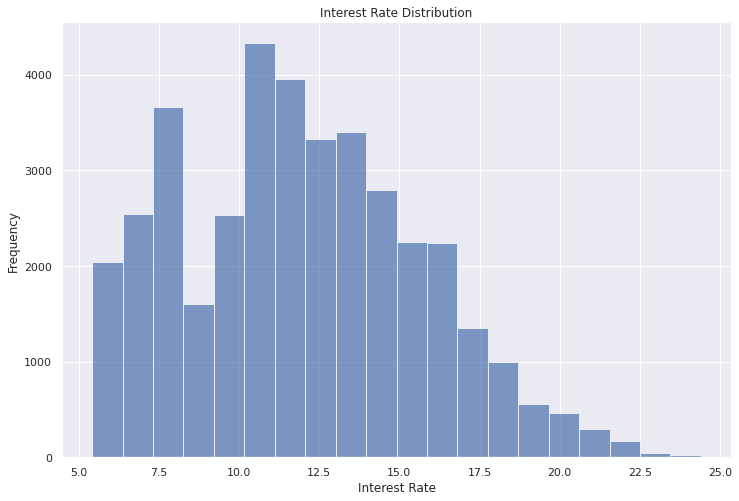

In [73]:
# Interest Rate Distribution analysis to see where the interest rates are predominantly present
y = loan.int_rate.values
pd.Series(y).plot(kind='hist',alpha=.7, bins=20, title='Interest Rate Distribution',figsize=(12,8),grid=True)
sns.set()
plt.xlabel('Interest Rate')
plt.show();

Interest distribution signifies that the percentage is more concentrated between 10 and 14.There are also significant chunk for rate around 7.5.

**Question 10: How is loan amount distributed based on various Categorical columns?**
- Status
- Purpose
- State
- Home Ownership
- Term Month
- Income Verification Status

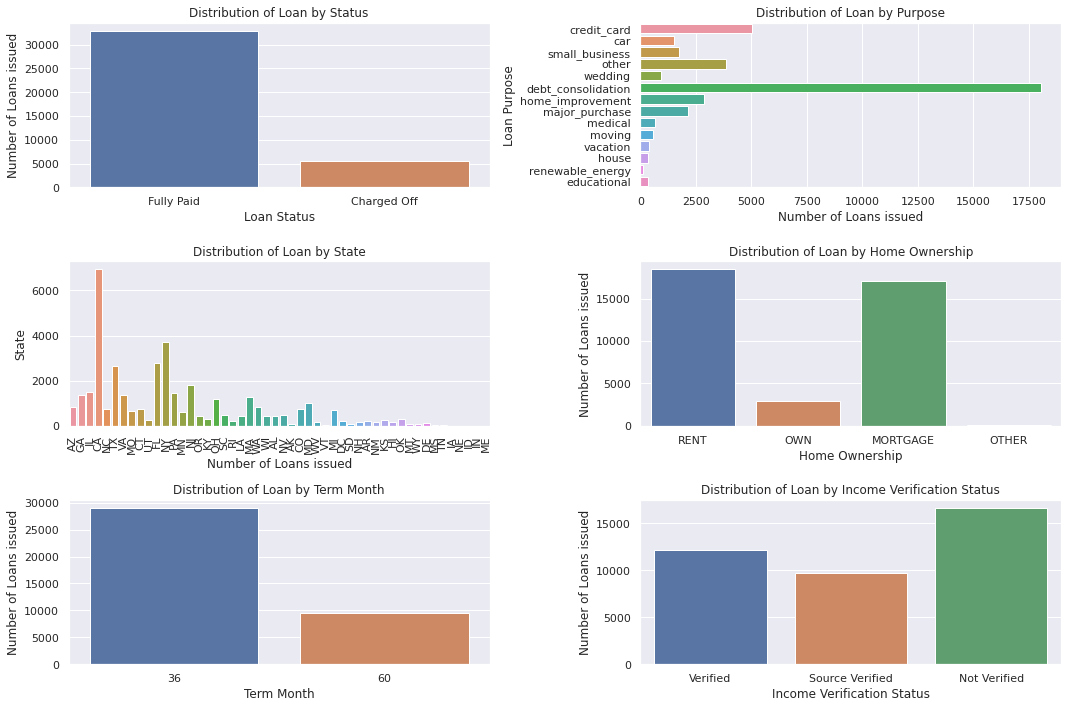

In [74]:
plt.figure(figsize=(15,10))

plt.figure(1)

# Distribution of Loans by Status
plt.subplot(3,2,1)
sns.countplot(x='loan_status', data=loan)
plt.title('Distribution of Loan by Status')
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans issued")

# Distribution of Loan by Purpose
plt.subplot(3,2,2)
sns.countplot(y='purpose', data=loan)
plt.title('Distribution of Loan by Purpose')
plt.xlabel("Number of Loans issued")
plt.ylabel("Loan Purpose")

# Distribution of Loan by State
plt.subplot(3,2,3)
sns.countplot(x='addr_state', data=loan)
plt.title('Distribution of Loan by State')
plt.xlabel("Number of Loans issued")
plt.ylabel("State")
# To rotate axis text
plt.xticks(rotation=90)

# Distribution of Loan by Home Ownership
plt.subplot(3,2,4)
sns.countplot(x='home_ownership', data=loan)
plt.title('Distribution of Loan by Home Ownership')
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans issued")

# Distribution of Loan by Term Month
plt.subplot(3,2,5)
sns.countplot(x='term_months', data=loan)
plt.title('Distribution of Loan by Term Month')
plt.xlabel("Term Month")
plt.ylabel("Number of Loans issued")

# Distribution of Loan by Income Verification Status
plt.subplot(3,2,6)
sns.countplot(x='verification_status', data=loan)
plt.title('Distribution of Loan by Income Verification Status')
plt.xlabel("Income Verification Status")
plt.ylabel("Number of Loans issued")

# To adjust spacing between subplots
plt.tight_layout()
plt.show();

- From this dataset, we have more observations(85%) from "Fully Paid" status.
- There are more loan applicant's with purpose of debt consolidation.
- There are more loan applicant's from California state.
- Most of the loan applicant's are rented and mortgage.
- There the more number of loan with 36 month term.
- There the more number of loan which were not verified the annual income.

## Summary and Conclusion
Here are the conclusions that we could draw about the Bank Loan Investment from our analysis :

- Major defaulters from Home purposes like Debt consolidation,Credit card and Small business and from B,C and D grades. The good thing is as the interest rate increases(grades F and G) there are less defaulters.
- From MORTGAGE category there are more defaulters from Home improvements along with Debt consolidation,Credit card and Small business. Overall one should be careful with Debt consolidation,Credit card and Small business loans when the borrowers don't have own house.
- From the dataset we were able to draw the conclusion that there are more loan applicant's with purpose of debt consolidation, California state has maximum of applicant's and most of the applicants are applied loan for rented and mortgage with more number of loan with 36 month term.
- The trend of defaulters is lowering when we take the set of 1-9 years of work experience and it suddenly increases in the case of 10 and 10+ years of work experienced members. The total number of defaulters with 1 year and No work experince is around 1k which is same with 10 and 10 + years of experience
- Grade is based on interest rate. As grade increases from A to G there is a increase in interest rate. Majority of loans were from A, B, and C grade which in turn has lower interest rate.
- The mean of revolving credit utilization is 49%, which means the average borrower is using most of their revolving credit at a time when they are seeking the loan. 
- Interest distribution signifies that the percentage is more concentrated between 10 and 14.
- Number of loans issued increased steadily by every year with a slight decrease in 2008.






## Future Work
- Before removing the columns can check if really the column values are null and any ways we can impute column values
- We can use newly calculated column ROI to do more analysis on other numeric fields 
- We can extend our analysis by working on remaining columns.
- Asking more questions might help in uncovering more hidden trends.

## References

Check out the following resources to learn more about the dataset and tools used in this notebook:
- Learn Data Science and Machine Learning Bootcamp by Jovian: https://jovian.ai/learn/zero-to-data-analyst-bootcamp
- `Pandas` user guide: https://pandas.pydata.org/docs/user_guide/index.html
- `Matplotlib` user guide: https://matplotlib.org/3.3.1/users/index.html
- `Seaborn` user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets
-  Intepretation of violin plot : https://mode.com/blog/violin-plot-examples/
- Learn more about Return Of investment : https://www.investopedia.com/articles/basics/10/guide-to-calculating-roi.asp

In [75]:
#Execute this to save new versions of the notebook
jovian.commit(project="loans-datasets-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ivarchan/loans-datasets-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ivarchan/loans-datasets-project


'https://jovian.ai/ivarchan/loans-datasets-project'